In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import Binarizer,KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [5]:
titanic = sns.load_dataset("titanic")
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
data=titanic[[ 'age', 'sibsp', 'parch', 'fare', 'survived']]

In [7]:
data.fillna(data[['age', 'sibsp', 'parch', 'fare', 'survived']].mean(), inplace=True)


In [8]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression

In [15]:
def trans(x):
    tf=KBinsDiscretizer(n_bins=10,encode='onehot',strategy='quantile')
    X_train_=tf.fit_transform(X_train)
    X_test_=tf.fit_transform(X_test)
    dt = DecisionTreeRegressor()
    lr=LogisticRegression()
    dt_ = DecisionTreeRegressor()
    lr_=LogisticRegression()
    dt.fit(X_train,y_train)
    lr.fit(X_train,y_train)
    dt_.fit(X_train_,y_train)
    lr_.fit(X_train_,y_train)
    print('Before transformation')
    print(lr.score(X_test,y_test))
    print(dt.score(X_test,y_test))
    print('After transformation')
    print(lr_.score(X_test_,y_test))
    print(dt_.score(X_test_,y_test))
    print("plot")
    print(X_train_)
    beaf(x,X_train_)
    return 
    
    

In [22]:
def beaf(x,X_train_):
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.histplot(X_train['fare'])
    plt.title(f'befor {x} Fare QQ Plot')
    # QQ Plot
    plt.subplot(1,2,2)
    sns.histplot(X_train_['fare'])
    plt.title(f'after {x} Fare QQ Plot')
    plt.show()
    

  (0, 7)	1.0
  (0, 9)	1.0
  (0, 11)	1.0
  (0, 21)	1.0
  (1, 2)	1.0
  (1, 9)	1.0
  (1, 11)	1.0
  (1, 18)	1.0
  (2, 6)	1.0
  (2, 9)	1.0
  (2, 11)	1.0
  (2, 16)	1.0
  (3, 3)	1.0
  (3, 10)	1.0
  (3, 11)	1.0
  (3, 15)	1.0
  (4, 0)	1.0
  (4, 10)	1.0
  (4, 13)	1.0
  (4, 21)	1.0
  (5, 3)	1.0
  (5, 9)	1.0
  (5, 12)	1.0
  (5, 23)	1.0
  (6, 7)	1.0
  :	:
  (705, 23)	1.0
  (706, 1)	1.0
  (706, 10)	1.0
  (706, 13)	1.0
  (706, 22)	1.0
  (707, 2)	1.0
  (707, 9)	1.0
  (707, 11)	1.0
  (707, 15)	1.0
  (708, 5)	1.0
  (708, 9)	1.0
  (708, 11)	1.0
  (708, 21)	1.0
  (709, 7)	1.0
  (709, 10)	1.0
  (709, 11)	1.0
  (709, 18)	1.0
  (710, 0)	1.0
  (710, 10)	1.0
  (710, 13)	1.0
  (710, 23)	1.0
  (711, 2)	1.0
  (711, 9)	1.0
  (711, 12)	1.0
  (711, 23)	1.0
Before transformation
0.6815642458100558
-0.3916172965968885
After transformation
0.7039106145251397
-0.05280037933851078
plot


IndexError: Index dimension must be 1 or 2

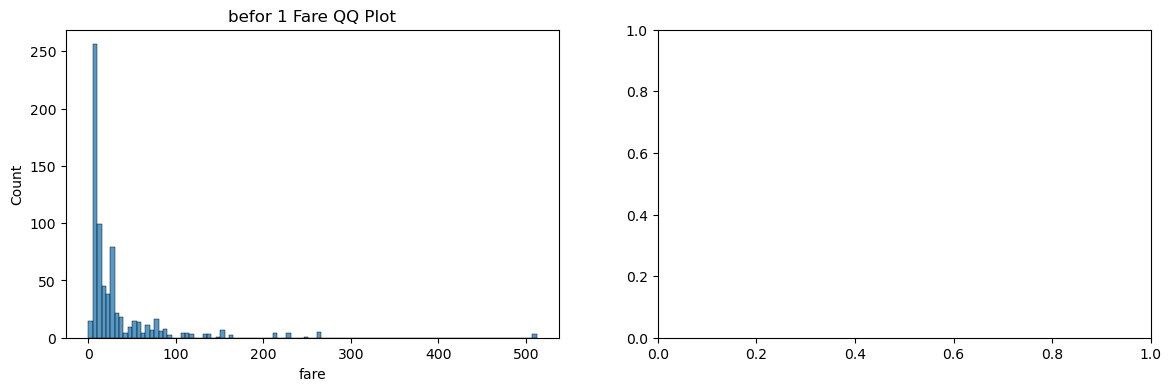

In [23]:
trans(1)